In [1]:
year=2019
month=7

In [2]:
import pandas as pd
import sys
sys.path.append('../../py')
import db
import weighted
import inspect
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import seaborn as sns
import scipy.stats as stats
import numpy as np
import math


In [3]:
from matplotlib.font_manager import _rebuild

_rebuild() #reload一下

In [4]:
conn=db.get_conn()
data_original=pd.read_sql(sql=f"select * from _{year}{month:02} where monthly_salary>0 and monthly_salary<80000", con=conn)
conn.close()

In [5]:
error_job_ids=['104660258','104142922','108434795','101357291','106253516','110368302','111391233','108665401','109277048'
                  ,'73857191','108584955','102824950','102824949','111391233','110884556']
data=data_original[~data_original.job_id.isin(error_job_ids)]

In [6]:
del data['publish_date']
del data['published_on_weekend']
del data['title']
del data['company_title']
del data['company_description']
del data['job_description']
del data['job_id']

In [7]:
def get_summary(data, career):
    
    salaries = data.monthly_salary.values
    headcounts = data.headcount.values
    head_count=np.sum(headcounts)
    salary_average=np.average(salaries, weights=headcounts)
    q = weighted.weighted_quantile(salaries,[0.025,0.5,0.975],headcounts)
    print(f"2019年{month}月全国招收{career}{head_count}人。2019年{month}月全国{career}平均工资{salary_average:.0f}元，工资中位数{q[1]:.0f}元，其中95%的人的工资介于{q[0]:.0f}元到{q[2]:.0f}元。\r\n")
    
get_summary(data, '程序员')

2019年7月全国招收程序员303830人。2019年7月全国程序员平均工资13389元，工资中位数12500元，其中95%的人的工资介于3750元到35000元。



In [8]:
#Common Functions
def get_sub_stats_by_col(data, col):
    categories=data[col].unique()
    salary_mean=[]
    salary_95_min=[]
    salary_95_max=[]
    salary_median=[]

    count=[]
    
    categorys_out=[]
    for category in categories:
        #print(feature)
        idata=data[data[col]==category]
        headcount=idata.headcount.sum()
        values = idata.monthly_salary.values
        weights = idata.headcount.values
        #print(str(headcount))
        if headcount==0:
            continue
        
        salary_mean.append(np.average(values, weights=weights))
        

        q = weighted.weighted_quantile(values,[0.025,0.5,0.975],weights)
        salary_95_min.append(q[0])
        salary_median.append(q[1])
        salary_95_max.append(q[2])
        count.append(idata.headcount.sum())
        categorys_out.append(category)
    sub_data=pd.DataFrame()
    sub_data[col]=[c for c in categorys_out]
    sub_data['salary_mean']=salary_mean
    sub_data['salary_95_min']=salary_95_min
    sub_data['salary_median']=salary_median
    sub_data['salary_95_max']=salary_95_max
    sub_data['head_count']=count
    sub_data['percentage']=count/np.sum(count)
    sub_data=sub_data.sort_values(by='salary_mean', ascending=False)

    return sub_data

data_format={"percentage":"{:.2%}","salary_mean":"{:.0f}","salary_median":"{:.0f}","salary_95_min":"{:.0f}","salary_95_max":"{:.0f}"}



In [9]:
data_career=get_sub_stats_by_col(data,'career')
data_career.style.format(data_format)

,career,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
2,系统架构师,21703,5250,20000,45833,10641,3.50%
1,算法工程师,19595,4591,17500,45833,24878,8.19%
0,一般程序员,12484,3750,11500,30000,267826,88.15%
3,爬虫工程师,12133,3857,11500,33286,452,0.15%
4,生物信息工程师,9879,7000,9000,14000,33,0.01%


# 程序员工资

In [10]:
data_city=get_sub_stats_by_col(data,'province')
#data_city.city=data_city.city.map(translate_dict)
data_city.style.hide_index().format(data_format)

province,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
北京,17614,3750,15000,45000,27778,9.14%
上海,16517,5250,15000,37500,47840,15.75%
广东,14612,4500,12500,35000,78230,25.75%
浙江,13953,3500,12500,35000,18553,6.11%
四川,12086,3500,11500,30000,12230,4.03%
江苏,12016,3750,11500,27083,31531,10.38%
湖北,11265,3750,10416,25000,15995,5.26%
湖南,11032,3750,10499,22500,6844,2.25%
陕西,10915,3750,10437,22500,7636,2.51%
天津,10776,3750,9500,22500,2447,0.81%


In [11]:
def describe(data_city, career):
    
    for index, row in data_city.iterrows():
        print(f"2019年{month}月{row[0]}招收{career}{row[5]}人。2019年{month}月{row[0]}{career}平均工资{row[1]:.0f}元，工资中位数{row[3]:.0f}元，其中95%的人的工资介于{row[2]:.0f}元到{row[4]:.0f}元。\r\n")


In [12]:
describe(data_city,'程序员')

2019年7月北京招收程序员27778人。2019年7月北京程序员平均工资17614元，工资中位数15000元，其中95%的人的工资介于3750元到45000元。

2019年7月上海招收程序员47840人。2019年7月上海程序员平均工资16517元，工资中位数15000元，其中95%的人的工资介于5250元到37500元。

2019年7月广东招收程序员78230人。2019年7月广东程序员平均工资14612元，工资中位数12500元，其中95%的人的工资介于4500元到35000元。

2019年7月浙江招收程序员18553人。2019年7月浙江程序员平均工资13953元，工资中位数12500元，其中95%的人的工资介于3500元到35000元。

2019年7月四川招收程序员12230人。2019年7月四川程序员平均工资12086元，工资中位数11500元，其中95%的人的工资介于3500元到30000元。

2019年7月江苏招收程序员31531人。2019年7月江苏程序员平均工资12016元，工资中位数11500元，其中95%的人的工资介于3750元到27083元。

2019年7月湖北招收程序员15995人。2019年7月湖北程序员平均工资11265元，工资中位数10416元，其中95%的人的工资介于3750元到25000元。

2019年7月湖南招收程序员6844人。2019年7月湖南程序员平均工资11032元，工资中位数10499元，其中95%的人的工资介于3750元到22500元。

2019年7月陕西招收程序员7636人。2019年7月陕西程序员平均工资10915元，工资中位数10437元，其中95%的人的工资介于3750元到22500元。

2019年7月天津招收程序员2447人。2019年7月天津程序员平均工资10776元，工资中位数9500元，其中95%的人的工资介于3750元到22500元。

2019年7月福建招收程序员6008人。2019年7月福建程序员平均工资10164元，工资中位数10000元，其中95%的人的工资介于3000元到20000元。

2019年7月重庆招收程序员4252人。2019年7月重庆程序员平均工资9896元，工资中位数9000元，其中95%的人的工资介于3860元到20000元。

2019年7月海南招收程

In [13]:
data_location = pd.read_csv('../../data/provincial_capital_locations.csv', encoding='utf-8')
data_location=data_location.set_index('province')

In [14]:
from mpl_toolkits.basemap import Basemap

In [15]:
def draw_map(data_city,headcount_scale, title):


    #cities = []
    scale = 5

    locations = [(116.407526, 39.90403),(120, 30)]
    #fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
    plt.rcParams['figure.figsize'] = [13, 13]
    #plt.figure(figsize = (10,5))
    fig, ax = plt.subplots()
    fig.title=title
    fig.figsize=(10,5)
    fig.dpi=80
    cn_map= Basemap(llcrnrlon=77, llcrnrlat=14, urcrnrlon=140, urcrnrlat=51, \
               projection='lcc', lat_1=33, lat_2=45, lon_0=100) # ‘lcc'将投影方式设置为兰伯特投影

    # load the shapefile, use the name 'states'
    cn_map.readshapefile(r'D:/data/basemap/gadm36_CHN_shp/gadm36_CHN_1', name='china', drawbounds=True, color='gray')
    cn_map.readshapefile(r'D:/data/basemap/gadm36_TWN_shp/gadm36_TWN_1', name='taiwan', drawbounds=True, color='gray')
    #geolocator = Nominatim(user_agent="my-application")



    salary_min=data_city.salary_mean.min()
    salary_max=data_city.salary_mean.max()
    salary_middle = (salary_min+salary_max)/2
    salary_scale=salary_max-salary_min

    for index, row in data_city.iterrows():
        province=row[0]
        
        longitude = data_location.loc[province,'longitude']
        latitude = data_location.loc[province,'latitude']
        salary=row[1]
        headcount=row[5]
        #color
        color_red=0
        color_green=0
        color_blue=0
        if salary>salary_middle:
            color_red = 255 #int((salary - salary_middle) / (salary_scale/2)*255)
            color_green = int((salary_max - salary) / (salary_scale/2)*255)
        else:
            color_blue = int((salary_middle - salary) / (salary_scale/2)*255)
            color_green = int((salary - salary_min) / (salary_scale/2)*255)
            color_red = int((salary - salary_min) / (salary_scale/2)*255)

        color = '#{:02x}{:02x}{:02x}'.format(color_red,color_green,color_blue)


        x, y = cn_map(longitude,latitude)
        cn_map.plot(x,y,marker='o',color=color,markersize=int(math.sqrt(headcount/headcount_scale))+8)
        #ax.annotate(city, (x,y), xytext=(5, 5), textcoords='offset points', fontsize=15)
        #"{}{:.0f}".format(city_cn, salary)
        #ax.text(x+5, y+5,city , fontweight='bold', fontsize=int(headcount/2500+12))
        fontsize=int(math.sqrt(headcount/headcount_scale))+13
        if province == '浙江':
            #x=x-400000
            y=y-100000

        elif province=='安徽':
            x=x-300000
            y=y+10000
        elif province=='江苏':
            x=x-150000
        elif province=='天津':
            y=y-50000
        elif province=='上海':
            x=x+50000
        elif province=='湖北':
            y=y-50000

        ax.text(x, y, "{}{:.0f}k".format(province, np.round(salary/1000)), fontweight='bold', fontsize=fontsize, bbox={'facecolor':color, 'alpha':0.3, 'pad':0})
    ax.text(2053805, 1077845, "https://github.com/juwikuang/china_job_survey".format(province, np.round(salary/1000)), fontweight='bold',color='#999999', fontsize=20, bbox={'facecolor':'#eeeeee', 'alpha':0.4, 'pad':0})    
    ax.text(205805, 107845, "https://github.com/juwikuang/china_job_survey".format(province, np.round(salary/1000)), fontweight='bold',color='#999999', fontsize=20, bbox={'facecolor':'#eeeeee', 'alpha':0.4, 'pad':0})    
    ax.text(805805, 4007845, title.format(province, np.round(salary/1000)), fontweight='bold',color='#111111', fontsize=25)    
    ax.text(805805, 3807845, "（城市大小代表招聘数量，颜色代表工资，红色最高，黄色次之，蓝最少）", fontweight='bold',color='#111111', fontsize=13)    
    #cn_map.drawcoastlines() #绘制海岸线
    #cn_map.drawcountries(linewidth=1.5) #绘制国家边界线
    plt.show()


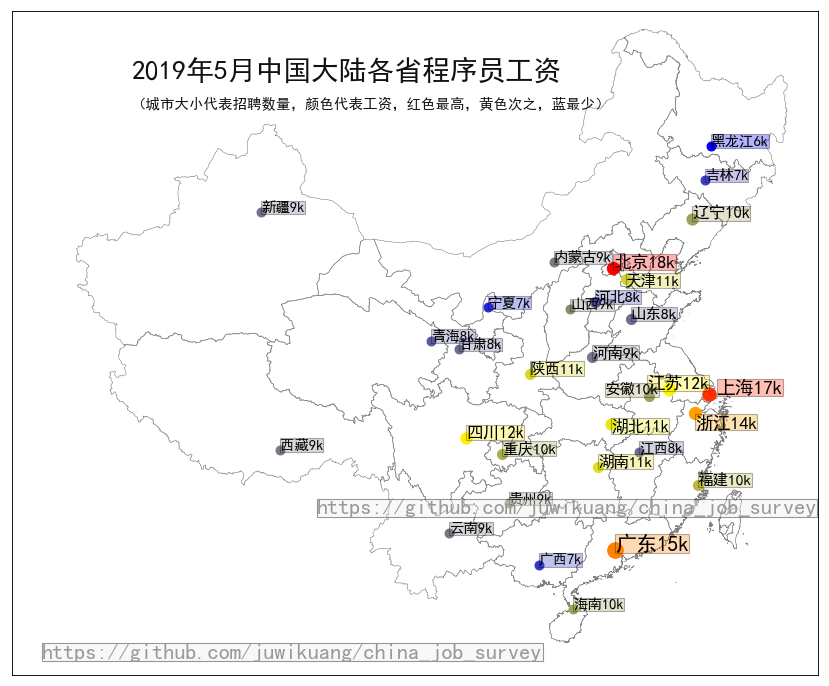

In [16]:
draw_map(data_city,2000,'2019年5月中国大陆各省程序员工资')

# 算法工程师

In [17]:
get_summary(data[data.career=='算法工程师'], '算法工程师')

2019年7月全国招收算法工程师24878人。2019年7月全国算法工程师平均工资19595元，工资中位数17500元，其中95%的人的工资介于4591元到45833元。



In [18]:
data_city_algorithm=get_sub_stats_by_col(data[data.career=='算法工程师'],'province')

data_city_algorithm.style.hide_index().format(data_format)

province,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
北京,26105,5270,22500,65000,3471,13.95%
上海,23214,5931,22500,50000,4605,18.51%
海南,20833,12500,15000,35000,18,0.07%
广东,20155,5500,17916,45000,6322,25.41%
内蒙古,19625,5250,19625,22500,6,0.02%
浙江,19455,3750,17500,45354,1775,7.13%
江苏,17206,5250,16000,35000,2827,11.36%
四川,15268,3783,14000,31250,1076,4.33%
湖北,14934,3750,15000,27500,1292,5.19%
湖南,14602,7000,12500,31016,405,1.63%


In [19]:
describe(data_city_algorithm,'算法工程师')

2019年7月北京招收算法工程师3471人。2019年7月北京算法工程师平均工资26105元，工资中位数22500元，其中95%的人的工资介于5270元到65000元。

2019年7月上海招收算法工程师4605人。2019年7月上海算法工程师平均工资23214元，工资中位数22500元，其中95%的人的工资介于5931元到50000元。

2019年7月海南招收算法工程师18人。2019年7月海南算法工程师平均工资20833元，工资中位数15000元，其中95%的人的工资介于12500元到35000元。

2019年7月广东招收算法工程师6322人。2019年7月广东算法工程师平均工资20155元，工资中位数17916元，其中95%的人的工资介于5500元到45000元。

2019年7月内蒙古招收算法工程师6人。2019年7月内蒙古算法工程师平均工资19625元，工资中位数19625元，其中95%的人的工资介于5250元到22500元。

2019年7月浙江招收算法工程师1775人。2019年7月浙江算法工程师平均工资19455元，工资中位数17500元，其中95%的人的工资介于3750元到45354元。

2019年7月江苏招收算法工程师2827人。2019年7月江苏算法工程师平均工资17206元，工资中位数16000元，其中95%的人的工资介于5250元到35000元。

2019年7月四川招收算法工程师1076人。2019年7月四川算法工程师平均工资15268元，工资中位数14000元，其中95%的人的工资介于3783元到31250元。

2019年7月湖北招收算法工程师1292人。2019年7月湖北算法工程师平均工资14934元，工资中位数15000元，其中95%的人的工资介于3750元到27500元。

2019年7月湖南招收算法工程师405人。2019年7月湖南算法工程师平均工资14602元，工资中位数12500元，其中95%的人的工资介于7000元到31016元。

2019年7月青海招收算法工程师1人。2019年7月青海算法工程师平均工资14583元，工资中位数14583元，其中95%的人的工资介于14583元到14583元。

2019年7月陕西招收算法工程师627人。2019年7月陕西算法工程师平均工资14042元，工资中位数12827元，其

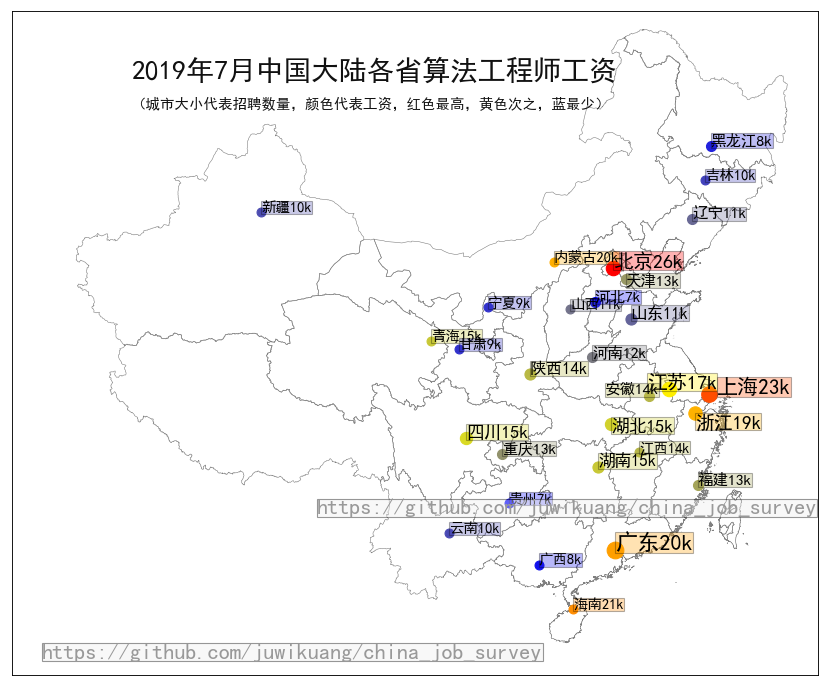

In [20]:
draw_map(data_city_algorithm,100,f'2019年{month}月中国大陆各省算法工程师工资')

# 系统架构师

In [21]:
get_summary(data[data.career=='系统架构师'], '系统架构师')

2019年7月全国招收系统架构师10641人。2019年7月全国系统架构师平均工资21703元，工资中位数20000元，其中95%的人的工资介于5250元到45833元。



In [22]:
data_city_architect=get_sub_stats_by_col(data[data.career=='系统架构师'],'province')

data_city_architect.style.hide_index().format(data_format)

province,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
北京,30296,5044,30000,60000,1285,12.08%
上海,24626,7000,22500,50000,2091,19.65%
天津,23462,5425,20667,67200,72,0.68%
广东,22594,5250,20861,50000,3096,29.10%
浙江,21744,4848,22500,42437,621,5.84%
四川,19150,5250,17500,44104,343,3.22%
河北,18759,7000,15833,35000,56,0.53%
江苏,18063,5250,17500,35271,927,8.71%
陕西,17131,5250,17500,37083,240,2.26%
湖北,16635,5278,15333,33173,483,4.54%


In [23]:
describe(data_city_architect,'系统架构师')

2019年7月北京招收系统架构师1285人。2019年7月北京系统架构师平均工资30296元，工资中位数30000元，其中95%的人的工资介于5044元到60000元。

2019年7月上海招收系统架构师2091人。2019年7月上海系统架构师平均工资24626元，工资中位数22500元，其中95%的人的工资介于7000元到50000元。

2019年7月天津招收系统架构师72人。2019年7月天津系统架构师平均工资23462元，工资中位数20667元，其中95%的人的工资介于5425元到67200元。

2019年7月广东招收系统架构师3096人。2019年7月广东系统架构师平均工资22594元，工资中位数20861元，其中95%的人的工资介于5250元到50000元。

2019年7月浙江招收系统架构师621人。2019年7月浙江系统架构师平均工资21744元，工资中位数22500元，其中95%的人的工资介于4848元到42437元。

2019年7月四川招收系统架构师343人。2019年7月四川系统架构师平均工资19150元，工资中位数17500元，其中95%的人的工资介于5250元到44104元。

2019年7月河北招收系统架构师56人。2019年7月河北系统架构师平均工资18759元，工资中位数15833元，其中95%的人的工资介于7000元到35000元。

2019年7月江苏招收系统架构师927人。2019年7月江苏系统架构师平均工资18063元，工资中位数17500元，其中95%的人的工资介于5250元到35271元。

2019年7月陕西招收系统架构师240人。2019年7月陕西系统架构师平均工资17131元，工资中位数17500元，其中95%的人的工资介于5250元到37083元。

2019年7月湖北招收系统架构师483人。2019年7月湖北系统架构师平均工资16635元，工资中位数15333元，其中95%的人的工资介于5278元到33173元。

2019年7月山西招收系统架构师19人。2019年7月山西系统架构师平均工资16158元，工资中位数16786元，其中95%的人的工资介于5000元到22500元。

2019年7月湖南招收系统架构师206人。2019年7月湖南系统架构师平均工资15616元，工资中位数15000元，其中95%的人

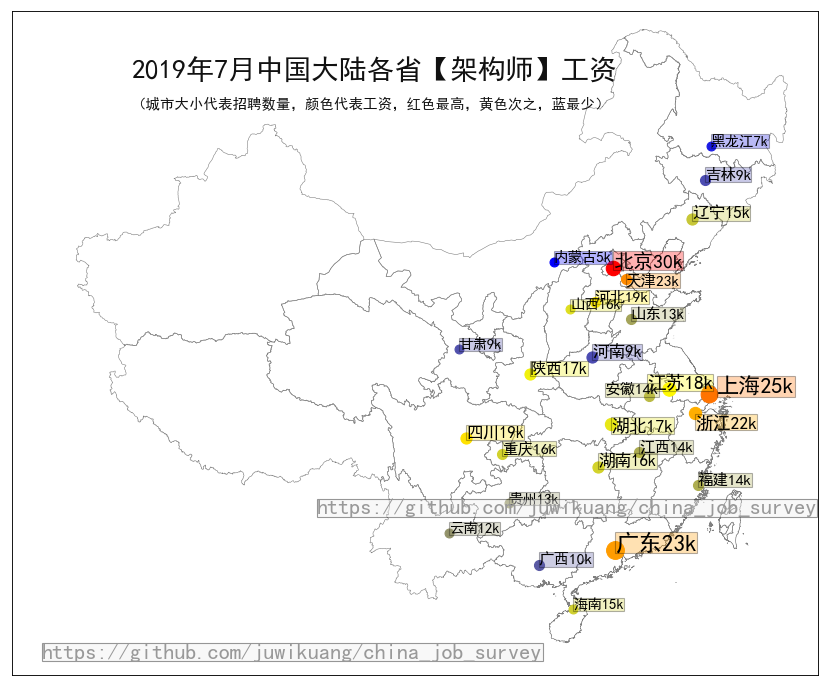

In [24]:
draw_map(data_city_architect,40,f'2019年{month}月中国大陆各省【架构师】工资')

# 生物信息工程师

In [25]:
get_summary(data[data.career=='生物信息工程师'], '生物信息工程师')

2019年7月全国招收生物信息工程师33人。2019年7月全国生物信息工程师平均工资9879元，工资中位数9000元，其中95%的人的工资介于7000元到14000元。



In [26]:
data_bio=get_sub_stats_by_col(data[data.career=='生物信息工程师'],'province')
#data_bio.city=data_bio.city.map(translate_dict)
data_bio.style.hide_index().format(data_format)

province,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
北京,12500,12500,12500,12500,2,6.06%
浙江,12000,11500,12000,12500,2,6.06%
吉林,11500,11500,11500,11500,2,6.06%
广东,9885,7000,8800,14000,13,39.39%
江苏,9875,9000,9875,12500,4,12.12%
上海,9800,8000,9800,12500,5,15.15%
湖北,9000,9000,9000,9000,1,3.03%
江西,7000,7000,7000,7000,1,3.03%
广西,7000,7000,7000,7000,3,9.09%


In [27]:
describe(data_bio,'生物信息工程师')

2019年7月北京招收生物信息工程师2人。2019年7月北京生物信息工程师平均工资12500元，工资中位数12500元，其中95%的人的工资介于12500元到12500元。

2019年7月浙江招收生物信息工程师2人。2019年7月浙江生物信息工程师平均工资12000元，工资中位数12000元，其中95%的人的工资介于11500元到12500元。

2019年7月吉林招收生物信息工程师2人。2019年7月吉林生物信息工程师平均工资11500元，工资中位数11500元，其中95%的人的工资介于11500元到11500元。

2019年7月广东招收生物信息工程师13人。2019年7月广东生物信息工程师平均工资9885元，工资中位数8800元，其中95%的人的工资介于7000元到14000元。

2019年7月江苏招收生物信息工程师4人。2019年7月江苏生物信息工程师平均工资9875元，工资中位数9875元，其中95%的人的工资介于9000元到12500元。

2019年7月上海招收生物信息工程师5人。2019年7月上海生物信息工程师平均工资9800元，工资中位数9800元，其中95%的人的工资介于8000元到12500元。

2019年7月湖北招收生物信息工程师1人。2019年7月湖北生物信息工程师平均工资9000元，工资中位数9000元，其中95%的人的工资介于9000元到9000元。

2019年7月江西招收生物信息工程师1人。2019年7月江西生物信息工程师平均工资7000元，工资中位数7000元，其中95%的人的工资介于7000元到7000元。

2019年7月广西招收生物信息工程师3人。2019年7月广西生物信息工程师平均工资7000元，工资中位数7000元，其中95%的人的工资介于7000元到7000元。



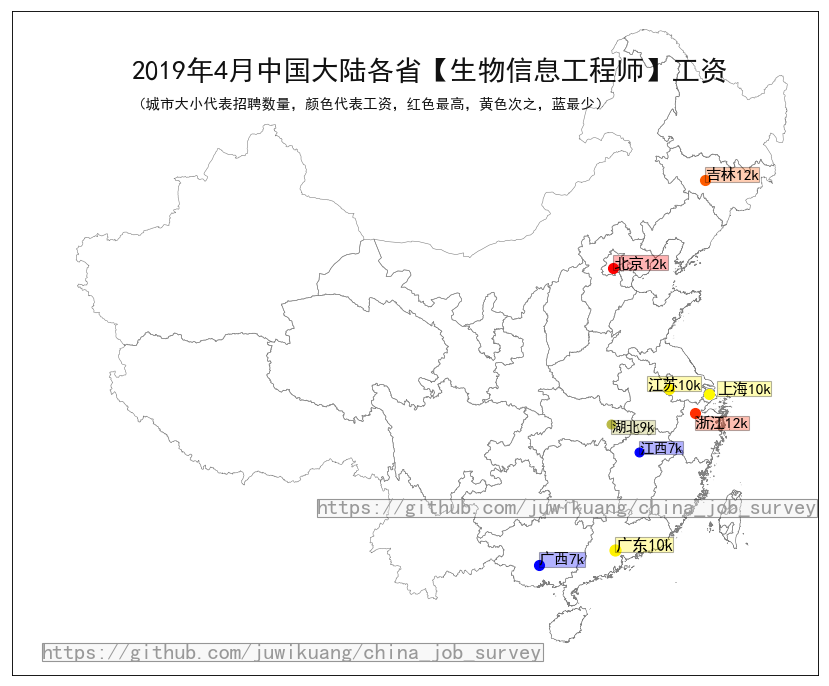

In [28]:
draw_map(data_bio,2,'2019年4月中国大陆各省【生物信息工程师】工资')

# 爬虫工程师

In [29]:
get_summary(data[data.career=='爬虫工程师'], '爬虫工程师')

2019年7月全国招收爬虫工程师452人。2019年7月全国爬虫工程师平均工资12133元，工资中位数11500元，其中95%的人的工资介于3857元到33286元。



In [30]:
data_spider=get_sub_stats_by_col(data[data.career=='爬虫工程师'],'province')


data_spider=data_spider[data_spider.head_count>10]
data_spider.style.hide_index().format(data_format)

province,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
北京,15604,2050,12500,36917,48,10.62%
山东,14818,9000,12857,27500,11,2.43%
上海,13595,5027,12500,28906,105,23.23%
浙江,13357,9000,12167,22500,14,3.10%
江苏,12568,7000,12500,22146,37,8.19%
广东,12508,4370,11250,34583,128,28.32%
湖北,10872,8000,11625,12500,17,3.76%
湖南,9194,7000,9000,11500,31,6.86%
四川,6750,2250,5906,14000,20,4.42%
河北,6250,6250,6250,6250,16,3.54%


In [31]:
describe(data_spider, '爬虫工程师')

2019年7月北京招收爬虫工程师48人。2019年7月北京爬虫工程师平均工资15604元，工资中位数12500元，其中95%的人的工资介于2050元到36917元。

2019年7月山东招收爬虫工程师11人。2019年7月山东爬虫工程师平均工资14818元，工资中位数12857元，其中95%的人的工资介于9000元到27500元。

2019年7月上海招收爬虫工程师105人。2019年7月上海爬虫工程师平均工资13595元，工资中位数12500元，其中95%的人的工资介于5027元到28906元。

2019年7月浙江招收爬虫工程师14人。2019年7月浙江爬虫工程师平均工资13357元，工资中位数12167元，其中95%的人的工资介于9000元到22500元。

2019年7月江苏招收爬虫工程师37人。2019年7月江苏爬虫工程师平均工资12568元，工资中位数12500元，其中95%的人的工资介于7000元到22146元。

2019年7月广东招收爬虫工程师128人。2019年7月广东爬虫工程师平均工资12508元，工资中位数11250元，其中95%的人的工资介于4370元到34583元。

2019年7月湖北招收爬虫工程师17人。2019年7月湖北爬虫工程师平均工资10872元，工资中位数11625元，其中95%的人的工资介于8000元到12500元。

2019年7月湖南招收爬虫工程师31人。2019年7月湖南爬虫工程师平均工资9194元，工资中位数9000元，其中95%的人的工资介于7000元到11500元。

2019年7月四川招收爬虫工程师20人。2019年7月四川爬虫工程师平均工资6750元，工资中位数5906元，其中95%的人的工资介于2250元到14000元。

2019年7月河北招收爬虫工程师16人。2019年7月河北爬虫工程师平均工资6250元，工资中位数6250元，其中95%的人的工资介于6250元到6250元。

2019年7月河南招收爬虫工程师14人。2019年7月河南爬虫工程师平均工资6000元，工资中位数5250元，其中95%的人的工资介于5000元到9000元。



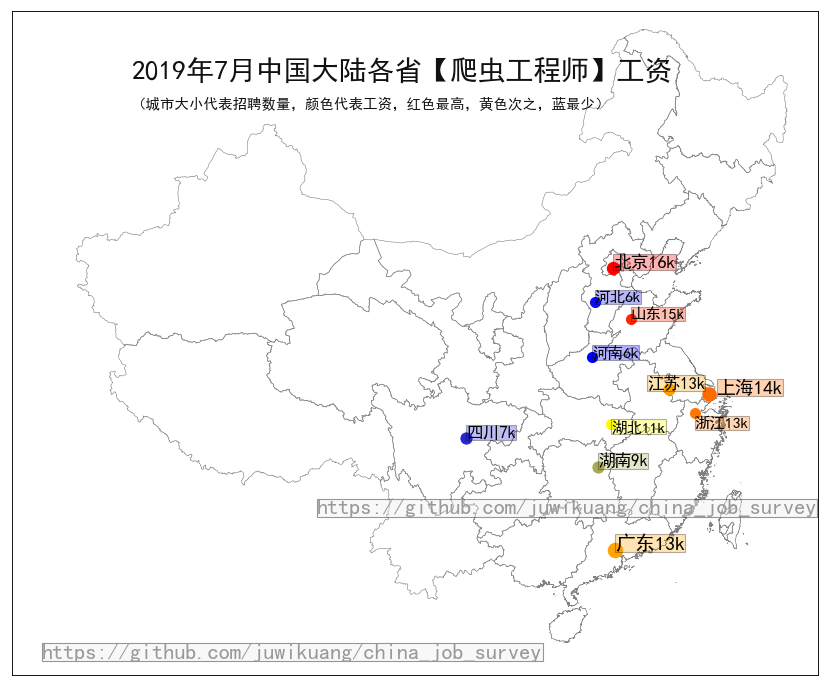

In [32]:
draw_map(data_spider,5,f'2019年{month}月中国大陆各省【爬虫工程师】工资')

# Java程序员

In [33]:
get_summary(data[data.pl_java==1], 'Java程序员')

2019年7月全国招收Java程序员139298人。2019年7月全国Java程序员平均工资13392元，工资中位数12500元，其中95%的人的工资介于3750元到32500元。



In [34]:
data_java=get_sub_stats_by_col(data[(data.pl_java==1)],'province')
data_java.style.hide_index().format(data_format)

province,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
上海,16817,5250,15000,35000,21235,15.24%
北京,16532,3750,13833,40000,13547,9.73%
广东,14848,4500,12500,35000,34718,24.92%
浙江,14325,3500,12500,34549,8832,6.34%
江苏,11980,3750,11500,25000,14363,10.31%
四川,11762,3000,11500,25000,5220,3.75%
湖北,11131,5000,10000,25000,6342,4.55%
陕西,10873,3000,10499,22500,3378,2.43%
湖南,10551,3206,10000,20000,3333,2.39%
天津,10472,3750,9500,22500,1056,0.76%


In [35]:
describe(data_java, 'Java程序员')

2019年7月上海招收Java程序员21235人。2019年7月上海Java程序员平均工资16817元，工资中位数15000元，其中95%的人的工资介于5250元到35000元。

2019年7月北京招收Java程序员13547人。2019年7月北京Java程序员平均工资16532元，工资中位数13833元，其中95%的人的工资介于3750元到40000元。

2019年7月广东招收Java程序员34718人。2019年7月广东Java程序员平均工资14848元，工资中位数12500元，其中95%的人的工资介于4500元到35000元。

2019年7月浙江招收Java程序员8832人。2019年7月浙江Java程序员平均工资14325元，工资中位数12500元，其中95%的人的工资介于3500元到34549元。

2019年7月江苏招收Java程序员14363人。2019年7月江苏Java程序员平均工资11980元，工资中位数11500元，其中95%的人的工资介于3750元到25000元。

2019年7月四川招收Java程序员5220人。2019年7月四川Java程序员平均工资11762元，工资中位数11500元，其中95%的人的工资介于3000元到25000元。

2019年7月湖北招收Java程序员6342人。2019年7月湖北Java程序员平均工资11131元，工资中位数10000元，其中95%的人的工资介于5000元到25000元。

2019年7月陕西招收Java程序员3378人。2019年7月陕西Java程序员平均工资10873元，工资中位数10499元，其中95%的人的工资介于3000元到22500元。

2019年7月湖南招收Java程序员3333人。2019年7月湖南Java程序员平均工资10551元，工资中位数10000元，其中95%的人的工资介于3206元到20000元。

2019年7月天津招收Java程序员1056人。2019年7月天津Java程序员平均工资10472元，工资中位数9500元，其中95%的人的工资介于3750元到22500元。

2019年7月贵州招收Java程序员551人。2019年7月贵州Java程序员平均工资10234元，工资中位数9333元，其中95%的人的工资介于5000元到15867元。

2019年7月辽宁

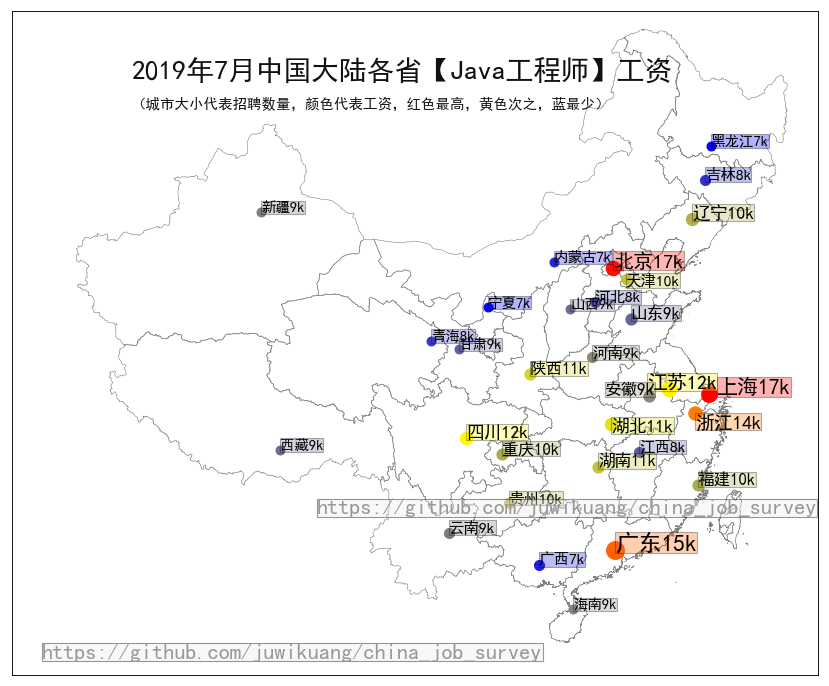

In [36]:
draw_map(data_java, 500, f'2019年{month}月中国大陆各省【Java工程师】工资')

# Python程序员

In [37]:
get_summary(data[data.pl_python==1], 'Python程序员')

2019年7月全国招收Python程序员31776人。2019年7月全国Python程序员平均工资17979元，工资中位数15833元，其中95%的人的工资介于3750元到45000元。



In [38]:
data_python=get_sub_stats_by_col(data[(data.pl_python==1)],'province')
data_python.style.hide_index().format(data_format)

province,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
北京,22512,3959,20000,55000,4467,14.06%
上海,21241,5272,20000,45833,6579,20.70%
广东,18739,5000,17500,45000,7533,23.71%
浙江,17017,3750,15000,45000,1920,6.04%
山西,15998,6675,15856,28333,94,0.30%
海南,15800,7500,13750,35000,40,0.13%
江苏,15711,4500,15000,35000,3291,10.36%
天津,15690,6500,18500,22500,355,1.12%
四川,15498,3750,14000,35000,1410,4.44%
湖北,14339,3750,13000,30000,1449,4.56%


In [39]:
describe(data_python, 'Python程序员')

2019年7月北京招收Python程序员4467人。2019年7月北京Python程序员平均工资22512元，工资中位数20000元，其中95%的人的工资介于3959元到55000元。

2019年7月上海招收Python程序员6579人。2019年7月上海Python程序员平均工资21241元，工资中位数20000元，其中95%的人的工资介于5272元到45833元。

2019年7月广东招收Python程序员7533人。2019年7月广东Python程序员平均工资18739元，工资中位数17500元，其中95%的人的工资介于5000元到45000元。

2019年7月浙江招收Python程序员1920人。2019年7月浙江Python程序员平均工资17017元，工资中位数15000元，其中95%的人的工资介于3750元到45000元。

2019年7月山西招收Python程序员94人。2019年7月山西Python程序员平均工资15998元，工资中位数15856元，其中95%的人的工资介于6675元到28333元。

2019年7月海南招收Python程序员40人。2019年7月海南Python程序员平均工资15800元，工资中位数13750元，其中95%的人的工资介于7500元到35000元。

2019年7月江苏招收Python程序员3291人。2019年7月江苏Python程序员平均工资15711元，工资中位数15000元，其中95%的人的工资介于4500元到35000元。

2019年7月天津招收Python程序员355人。2019年7月天津Python程序员平均工资15690元，工资中位数18500元，其中95%的人的工资介于6500元到22500元。

2019年7月四川招收Python程序员1410人。2019年7月四川Python程序员平均工资15498元，工资中位数14000元，其中95%的人的工资介于3750元到35000元。

2019年7月湖北招收Python程序员1449人。2019年7月湖北Python程序员平均工资14339元，工资中位数13000元，其中95%的人的工资介于3750元到30000元。

2019年7月湖南招收Python程序员714人。2019年7月湖南Python程序员平均工资13292元，工资中位数12500元

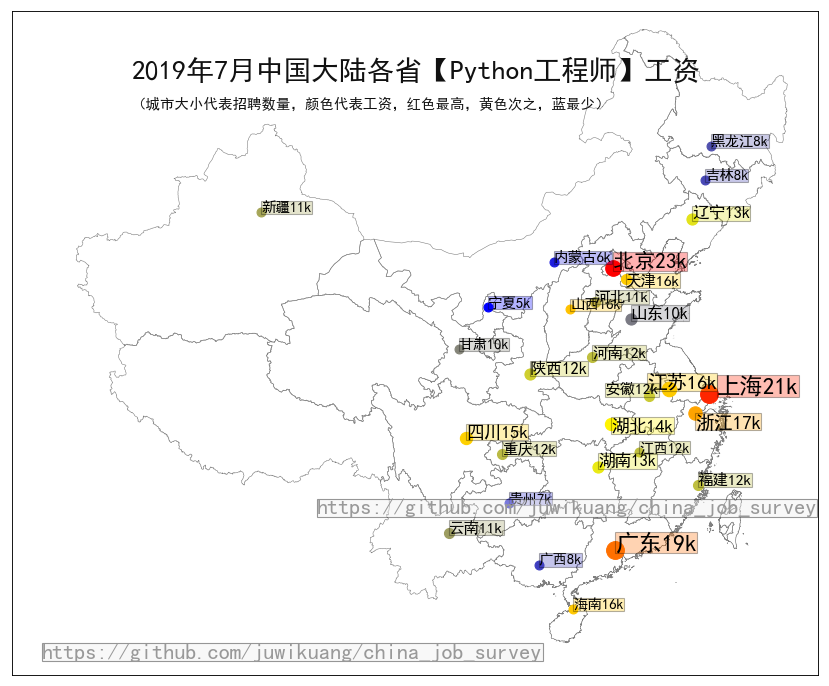

In [40]:
draw_map(data_python, 100,  f'2019年{month}月中国大陆各省【Python工程师】工资')